In [35]:

import soundfile as sf
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
%matplotlib inline
import numpy as np
import os

import sklearn

In [36]:


audio_path = 'Desktop/8.LAziza.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [37]:
print(x.shape, sr)

(689724,) 22050


In [38]:
lr.load(audio_path, sr=44100)

(array([ 0.        ,  0.        ,  0.        , ..., -0.03648269,
        -0.03296763, -0.01711612], dtype=float32),
 44100)

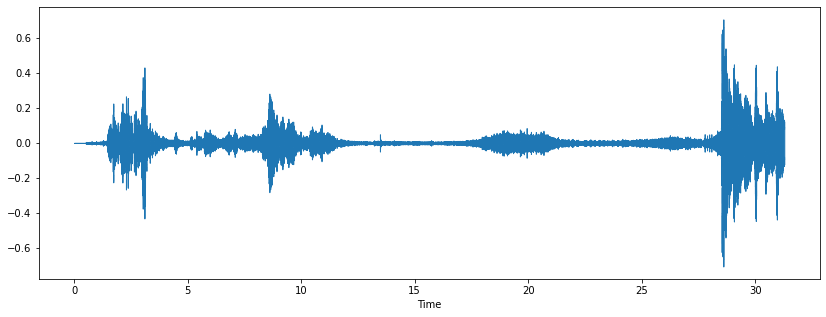

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
lr.display.waveshow(x, sr=sr) # Warning not waveplot but waveshow

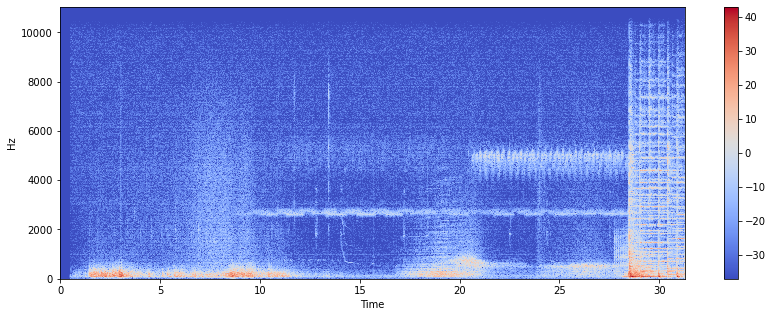

In [40]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

#The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip.
#Since all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.

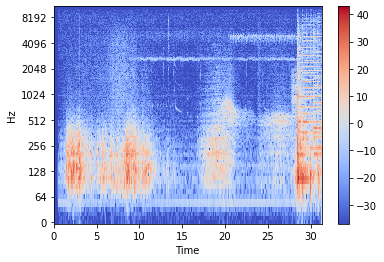

In [41]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

[Text(0.5, 1.0, 'log Power spectrogram')]

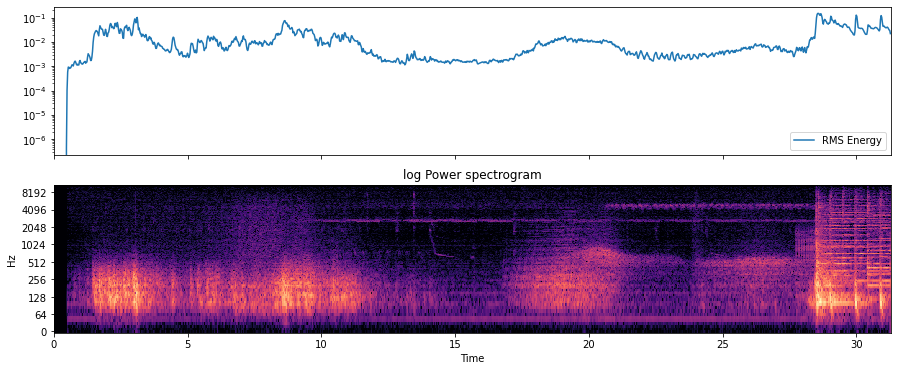

In [43]:
y, sr = librosa.load(audio_path)# Get RMS value from each frame's magnitude value
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

Zero crossing rate: 92354


Text(0.5, 1.0, 'LAziza')

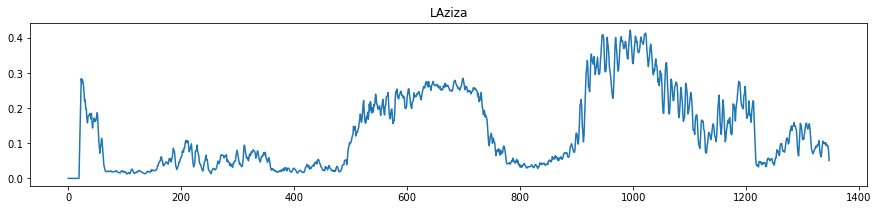

In [45]:
y, sr = librosa.load(audio_path)
zcrs = librosa.feature.zero_crossing_rate(y)
print(f"Zero crossing rate: {sum(librosa.zero_crossings(y))}")
plt.figure(figsize=(15, 3))
plt.plot(zcrs[0])
plt.title('LAziza')

<ipython-input-47-3995abc27ef4>:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02703857 -0.02856445
 -0.03375244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)# Displaying  the MFCCs:


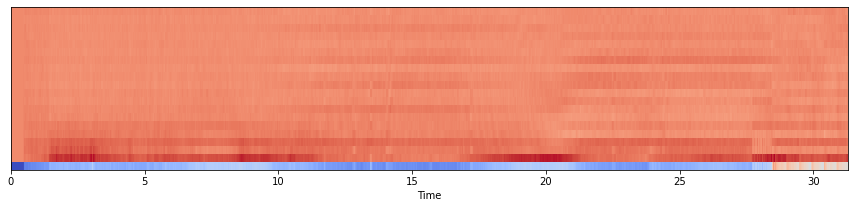

In [47]:
x, sr = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(x, sr=sr)# Displaying  the MFCCs:
plt.figure(figsize=(15, 3))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

<ipython-input-49-65115b0e1919>:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02703857 -0.02856445
 -0.03375244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)


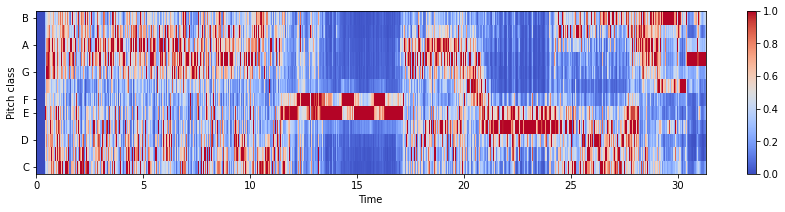

In [49]:
x, sr = librosa.load(audio_path)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
fig.colorbar(img, ax=ax)